# All kinds of network things 

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import regex as re 
from os import listdir
from os.path import isfile, join
import json 
# get files in directory 
onlyfiles = [f for f in listdir("wiki_content") if isfile(join("wiki_content", f))]

In [3]:
''' Extract links '''
theo_dict  = {}
for file in onlyfiles:
    with open(f'wiki_content/{file}','r', encoding = 'utf-8') as f:
        txt = f.read()
        links = re.findall('\[\[(.*?)(?:\|.*?)?]]', txt)
        name = file.split('.txt')[0].replace('_',' ')
        theo_dict.update({name:links}) 

In [4]:
''' Hvordan linker de til hinanden '''
# Sætter .replace('_', ' ') på name, for at have styr på fx 'Anselm_Strauss' links 
link_dict = {theorist:[_name.replace('_', ' ') for _name in links if _name.replace('_', ' ') in theo_dict.keys()]\
             for theorist, links in theo_dict.items()}

''' Link list '''
link_list = [(node_a, node_b) for node_a, nodes in link_dict.items() for node_b in nodes]

In [5]:
''' Get science attribute '''

with open('science_name_dict.json', 'r', encoding = 'utf-8') as f: 
    science_dict = json.load(f)
    
''' Get those that are in multiple scientific field lists - Marx is in both... '''

socs = set(science_dict['soc'])
anths = set(science_dict['anth'])
ecos = set(science_dict['eco'])
psys = set(science_dict['psy'])
pols = set(science_dict['pol'])

seen = []
repeated = []
for l in [socs, anths, ecos, psys, pols]:
    for i in l: # loop over de enkelte guys'n'gals
        if i in seen:
            repeated.append(i)
        else:
            seen.append(i)

''' Inverse the dict '''
inv_science_dict = {name:science for science, names in science_dict.items() for name in names}
''' change the scientific field to "both" if they are both in the soc and anth list '''
inv_science_dict = {name:('multiple' if name in repeated else sci)\
                    for name, sci in inv_science_dict.items()}

# Match keys to link_dict --> when importing link_dict, 'Anselm_Strauss' becomes 'Anselm Strauss'
# but in the inv_science_dict he is 'Anselm_Strauss'. So it is a mess without it   
inv_science_dict = {key.replace('_', ' '):val for key, val in inv_science_dict.items()}

with open('inv_science_name_dict.json', 'w', encoding = 'utf-8') as f: 
    json.dump(inv_science_dict, f)

In [8]:
''' Make network '''
import networkx as nx
import netwulf as nw
G = nx.DiGraph()
G.add_nodes_from(link_dict.keys())
G.add_edges_from(link_list)
nx.set_node_attributes(G, inv_science_dict, name = 'group') # node attributes 

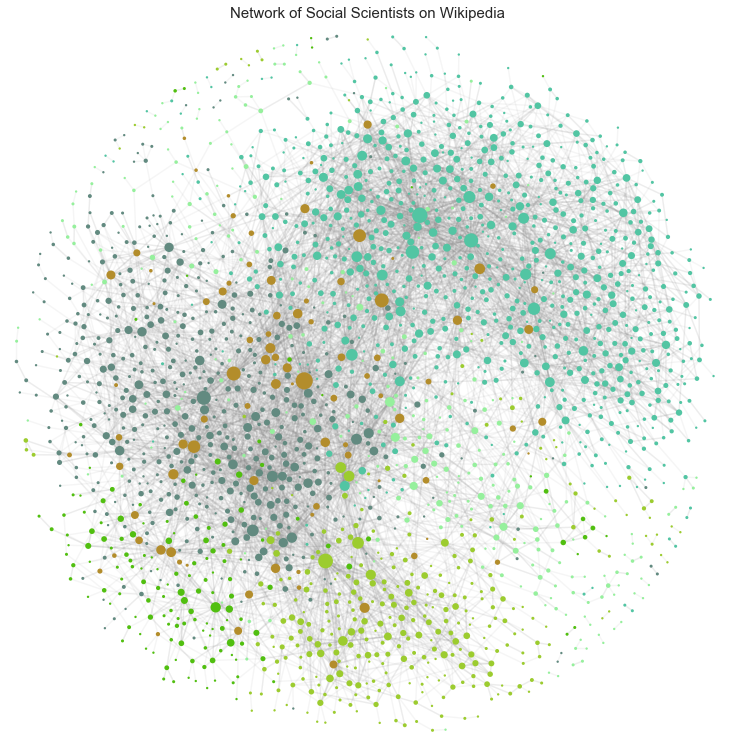

In [37]:
''' Plot network '''
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network, figsize = 10)
plt.title('Network of Social Scientists on Wikipedia', size = 15)
plt.show()

In [50]:
''' Save the network configurations '''
with open("network_configurations/big_network.json", 'w') as f:
    json.dump(network, f)
    
with open("network_configurations/big_config.json", 'w') as f:
    json.dump(config, f)

In [51]:
''' load the network configurations '''
with open("network_configurations/big_network.json", 'r') as f:
    network = json.load(f)

with open("network_configurations/big_config.json", 'r') as f:
    config = json.load(f)

In [81]:
import matplotlib
matplotlib.colors.rgb2hex(plt.cm.Spectral_r(2))

'#5b53a4'

In [42]:
network['nodes'][1]['color']

{'id': 'A. F. K. Organski',
 'x': 599.5700117314474,
 'y': 386.92298852811666,
 'x_canvas': 478.97925974603174,
 'y_canvas': 371.1826401306423,
 'radius': 1.1635687455175805,
 'color': '#96f09d'}

In [36]:
len(set(partition.values()))

22

In [ ]:
# Set community legend
for v in set(c_values):
    plt.scatter([],[], c=[plt.cm.Spectral_r(v/max(c_values))], label='Community {}'.format(v))

In [83]:
inv_science_dict

{'Peter Abell': 'soc',
 'Mark Abrams': 'soc',
 'Janet Abu-Lughod': 'soc',
 'Jane Addams': 'soc',
 'Richard Alba': 'soc',
 'Francesco Alberoni': 'soc',
 'Martin Albrow': 'soc',
 'Jeffrey C. Alexander': 'soc',
 'Edwin Amenta': 'soc',
 'Nancy Ammerman': 'soc',
 'Eric Anderson (sociologist)': 'soc',
 'Elijah Anderson': 'soc',
 'Stanislav Andreski': 'soc',
 'Aaron Antonovsky': 'soc',
 'Arjun Appadurai': 'multiple',
 'Andrew Arato': 'soc',
 'Margaret Archer': 'soc',
 'Hannah Arendt': 'soc',
 'Alcira Argumedo': 'soc',
 'Raymond Aron': 'soc',
 'Stanley Aronowitz': 'soc',
 'Giovanni Arrighi': 'soc',
 'Johan Asplund': 'soc',
 'Vilhelm Aubert': 'soc',
 'Francisco Ayala (novelist)': 'soc',
 'Élisabeth Badinter': 'soc',
 'Patrick Baert': 'soc',
 'Sergio Bagú': 'soc',
 'Kenneth D. Bailey (sociologist)': 'soc',
 'Georges Balandier': 'soc',
 'Emily Greene Balch': 'multiple',
 'Robert Balch': 'soc',
 'E. Digby Baltzell': 'soc',
 'Eileen Barker': 'soc',
 'S. Barry Barnes': 'soc',
 'Liberty Barnes': 'soc

In [85]:
x = len(set(partition.values()))

22

In [87]:
len(set(inv_science_dict.values()))

6

In [86]:
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

In [82]:
partition

{'A. F. K. Organski': 0,
 'A. H. J. Prins': 1,
 'A. L. Kroeber': 1,
 'Aaron Antonovsky': 2,
 'Aaron Cicourel': 3,
 'Aaron Wildavsky': 0,
 'Abba P. Lerner': 4,
 'Abhijit Banerjee': 4,
 'Abraham Maslow': 2,
 'Abraham Moles': 5,
 'Adair Turner, Baron Turner of Ecchinswell': 6,
 'Adam Kuper': 1,
 'Adam Possamai': 5,
 'Adam Przeworski': 5,
 'Adam Smith': 6,
 'Adelbert Ames Jr.': 2,
 'Adolf A. Berle': 7,
 'Adolphe Quetelet': 6,
 'Adolph Wagner': 6,
 'Adriana Kugler': 7,
 'Adrian Furnham': 2,
 'Agustín Carstens': 4,
 'Alain Touraine': 5,
 'Alan Blinder': 4,
 'Alan Greenspan': 4,
 'Alan Macfarlane': 6,
 'Alan Manning': 4,
 'Alan S. Kaufman': 2,
 'Alan Walters': 4,
 'Alberto Alesina': 4,
 'Albert Bandura': 2,
 'Albert Benschop': 5,
 'Albert Buell Lewis': 1,
 'Albert Ellis': 2,
 'Albert Schäffle': 6,
 'Albion Woodbury Small': 3,
 'Alejandro Portes': 2,
 'Alexander Deichsel': 5,
 'Alexander Luria': 2,
 'Alexander Tarasov': 5,
 'Alexander Van der Bellen': 6,
 'Alexander Wendt': 0,
 'Alexis de Tocq

In [ ]:
def redefine_attr(nx_configs, partition_dict, _cmap = plt.cm.Spectral_r):
    import copy
    import matplotlib
    
    # Copy dict - deep copy as the values are nested in a list
    new_nw = copy.deepcopy(nx_configs)
    
    n_attr = len(set(partition_dict.values())) # how many colors do we need? 
    
    {category: for category in sorted(set(partition_dict.values()))}
    
    for node_nr in range(len(nx_configs['nodes'])):
        node = network['nodes'][1]['id'] # node id 
        attr = partition_dict[node] # get the attribute class of the node
        num_attr = num_attr_dict[attr] # get the numerical 
        _cmap_color = _cmap(num_attr)
        new_nw['nodes'][1]['color'] = matplotlib.colors.rgb2hex(_camp_color) # overwrite node color based on new attr
        
    return new_nw

Text(0.5, 1.0, 'Network of Social Scientists on Wikipedia')

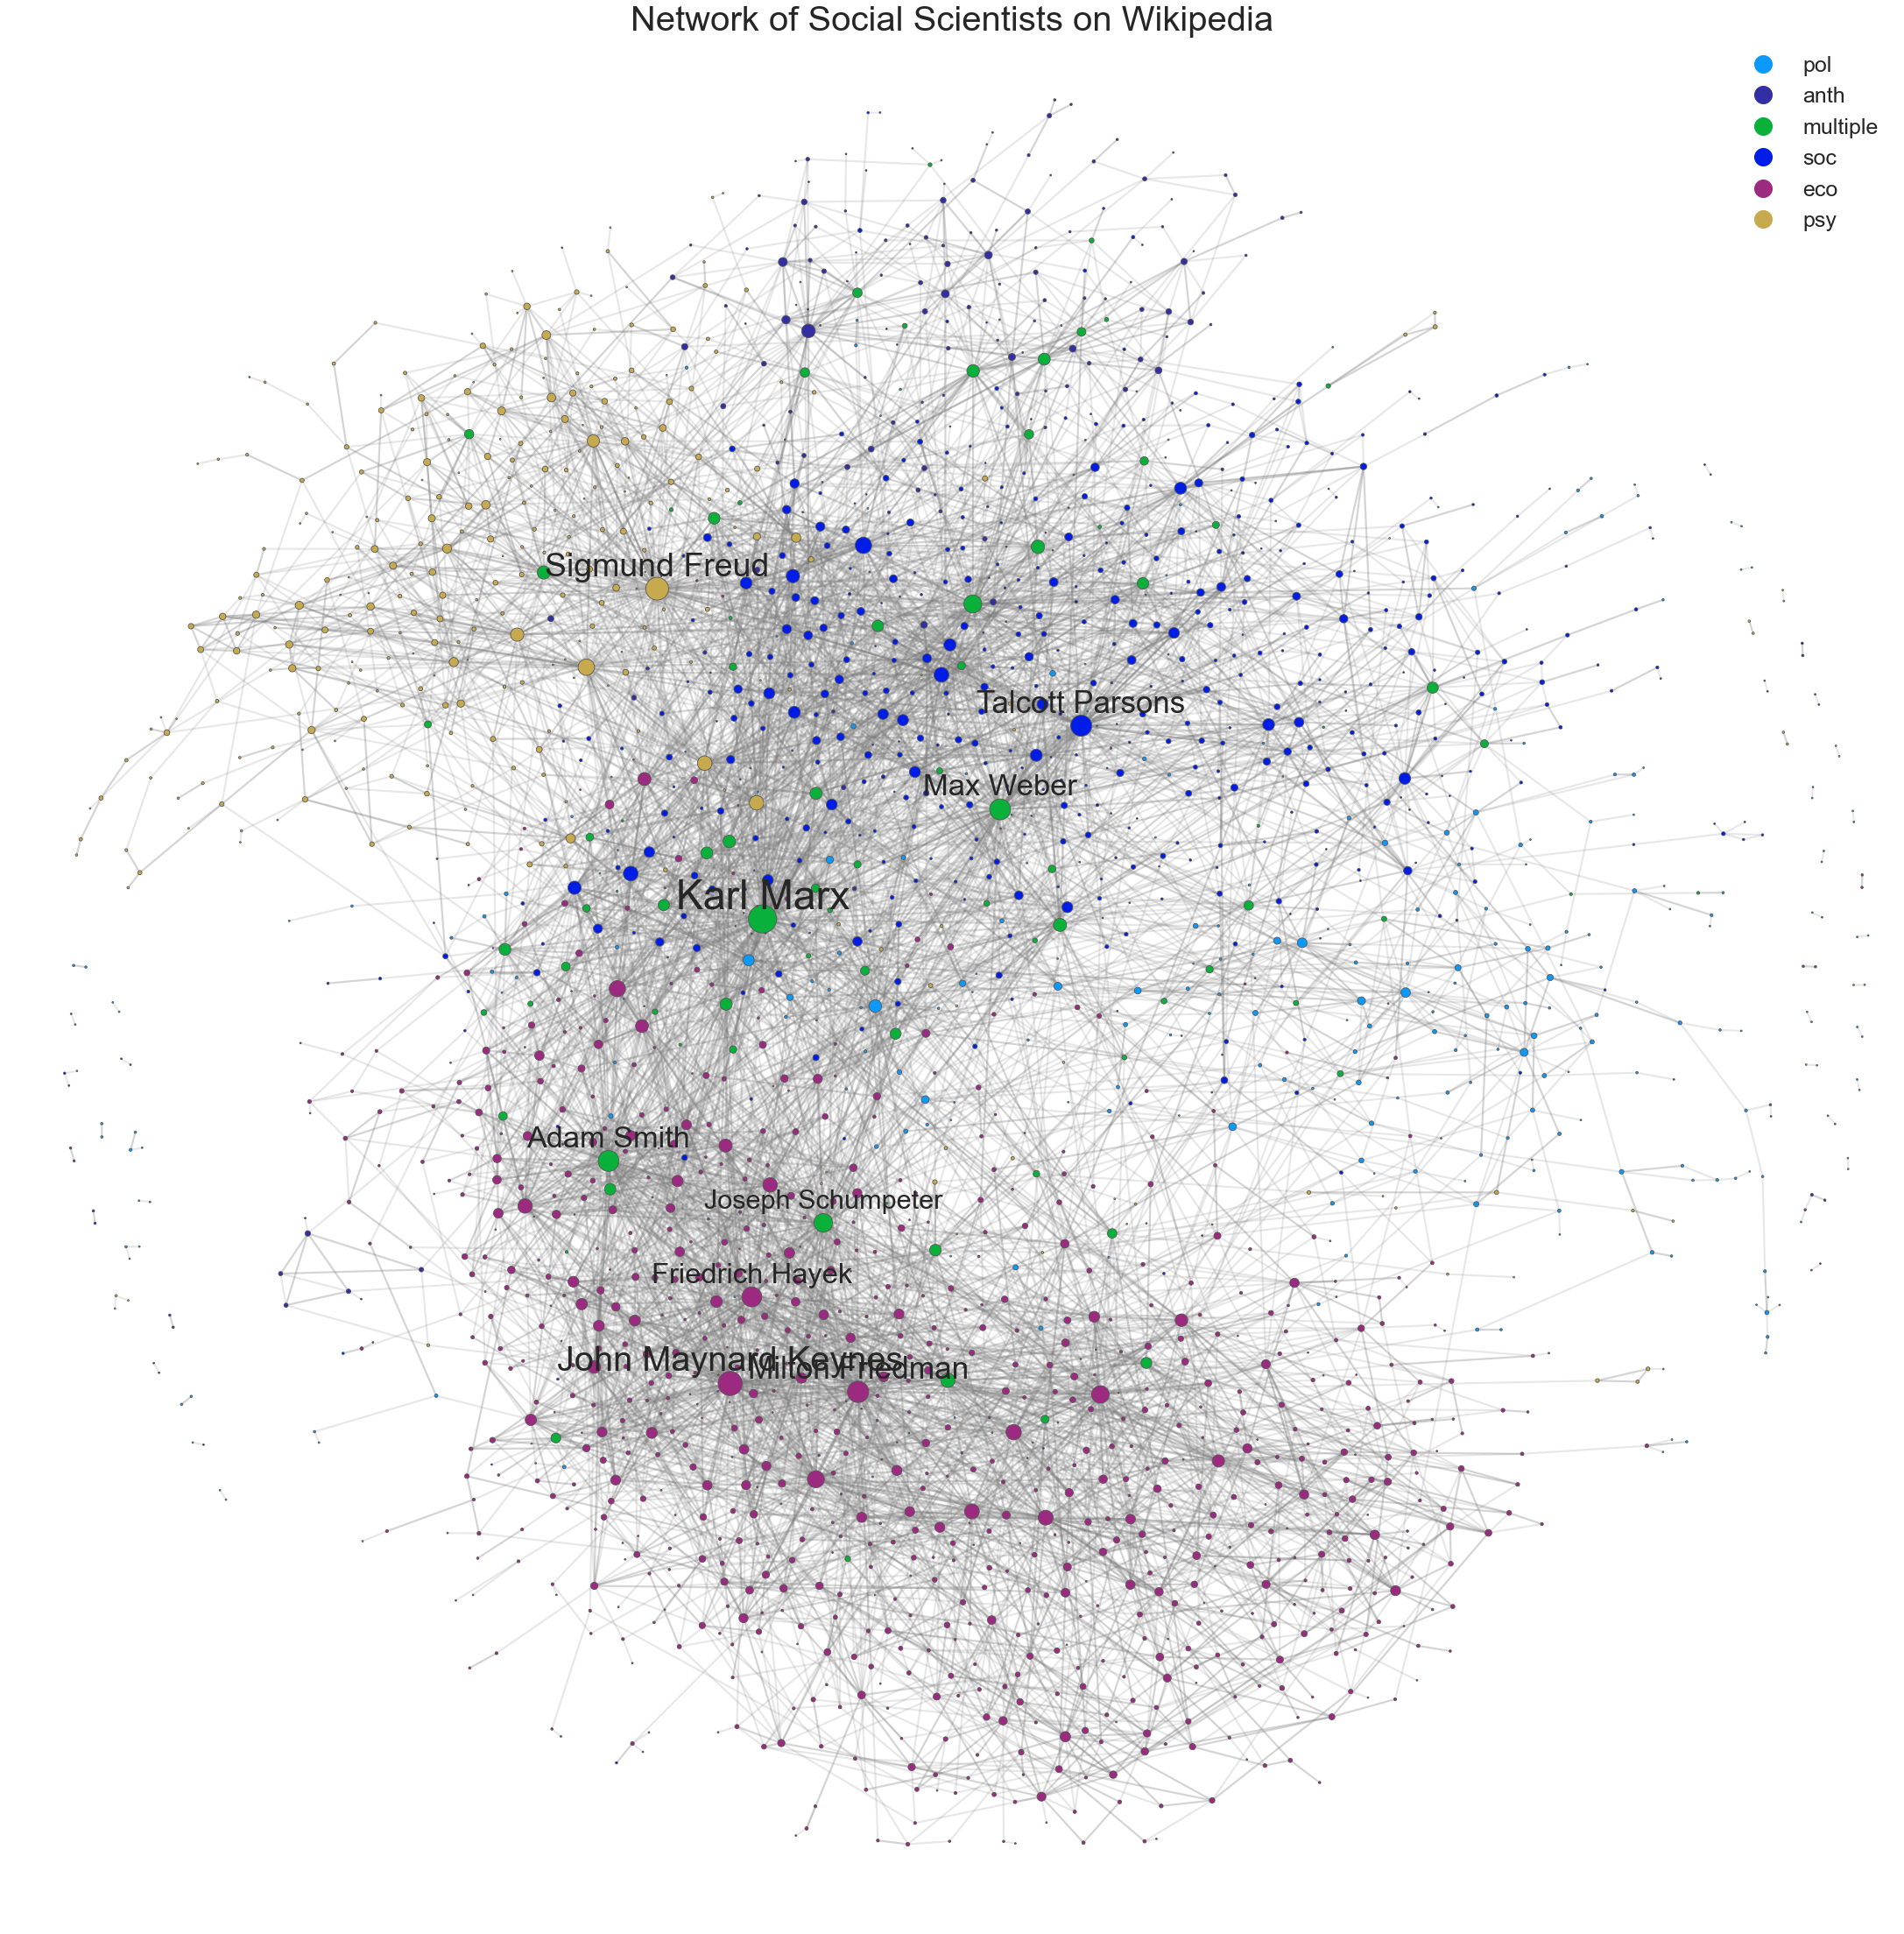

In [19]:
# Drawing the network
fig, ax = nw.draw_netwulf(network)

# assigning labels only to the largest nodes 
for node_nr in range(len(network['nodes'])):
    if network['nodes'][node_nr]['radius']>5:
        nw.tools.add_node_label(ax,
                                network,
                                dy = 12,
                                node_id = network['nodes'][node_nr]['id'],
                                size=network['nodes'][node_nr]['radius']*6)
    else:
        pass

# Drawing a big figure
plt.rcParams["figure.figsize"] = (30,30)

val_map = {inv_science_dict[node['id']]:node['color'] for node in network['nodes']}

# Add legends
for label in val_map.keys():
    ax.plot([],[],color=val_map[label], label=label, marker='o', linestyle="None", markersize = 20)

plt.legend(fontsize = 25)
ax.set_title('Network of Social Scientists on Wikipedia', size = 40)
# Saving as pdf
#plt.savefig('Plots/field_network_title.png', dpi=None, facecolor='w', edgecolor='w', bbox_inches='tight')

In [20]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

''' Degree distribution '''
def plot_deg_dist(deg_seq, title = 'Degree distribution', kwgs = {}):
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[0], **kwgs)
    ax[0].set_title(title)
    ax[0].set_ylabel('Frequency', size = 15)
    
    del deg_seq[0] # messes up the log plot so remove 0 deg nodes 
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[1], **kwgs)

    ax[1].set_title(title + ' (log scaled)')
    ax[1].set_ylabel('Frequency', size = 15)
    ax[1].set_xlabel('k', size = 15)
    # logscale the axes
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    
    plt.show()

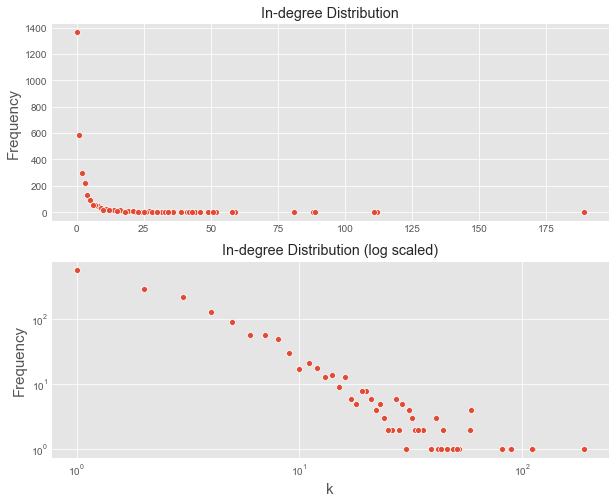

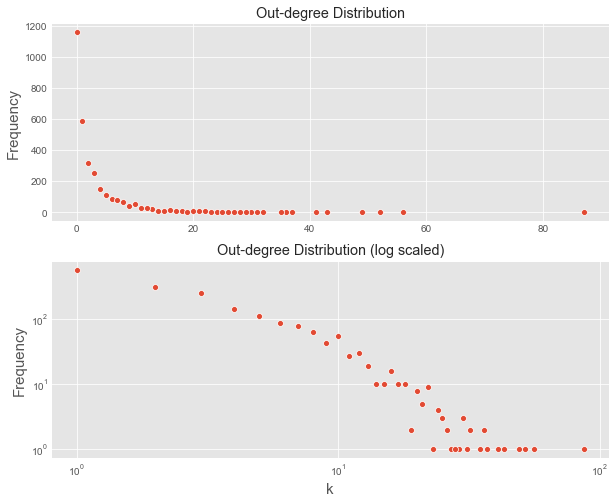

In [21]:
''' Plot degree distribution '''
import seaborn as sns
from collections import Counter

# Get in and out degree
in_deg_dist = Counter([d for n,d in G.in_degree()])
out_deg_dist = Counter([d for n,d in G.out_degree()])

plot_deg_dist(in_deg_dist, 'In-degree Distribution')
plot_deg_dist(out_deg_dist, 'Out-degree Distribution')

In [23]:
''' Plot the top X out- and in- degree nodes '''
def plot_top_nodes(top_n = 50, in_deg = True):
    if in_deg:
        top_nodes = sorted(dict(G.in_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    else:
        top_nodes = sorted(dict(G.out_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    x = [_[0] for _ in top_nodes]
    y = [_[1] for _ in top_nodes]

    fig, ax = plt.subplots(figsize = (12,6))
    sns.scatterplot(x,y, ax=ax)
    ax.set_ylabel('Degree', size = 15)
    plt.xticks(rotation=90, size = 12)
    if in_deg:
        ax.set_title(f'Distribution of in-degree for top {top_n}', size = 15)
    else:
        ax.set_title(f'Distribution of out-degree for top {top_n}', size = 15)
    plt.show()

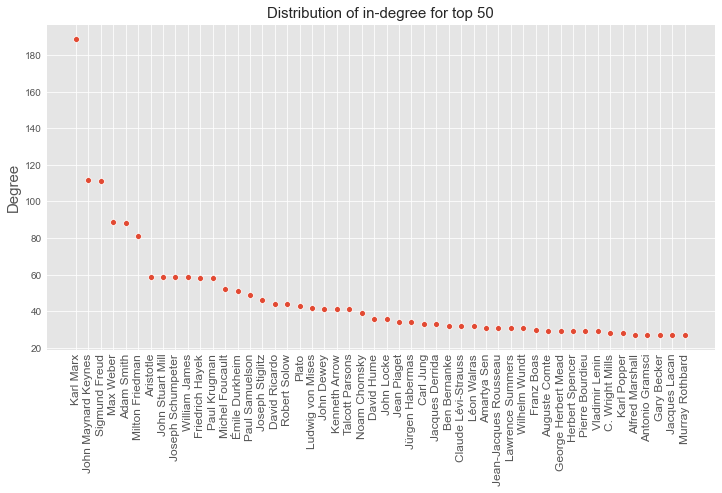

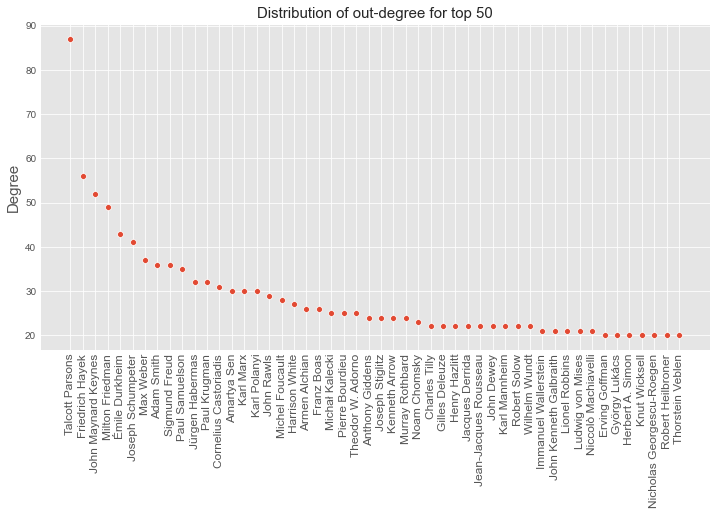

In [24]:
plot_top_nodes(in_deg = True)
plot_top_nodes(in_deg = False)

# Communities 

In [67]:
import community
from fa2 import ForceAtlas2

In [68]:
''' Only the GCC, otherwise there will be about 300+ communities '''
G_test = G.copy()
c = max(nx.weakly_connected_components(G_test), key=len) # largest connected component
GCC = G_test.subgraph(c).copy() # make subgraph of the largest connected component
G_undir = GCC.to_undirected().copy() # undirected

# Louvain modularity for partition
partition = community.best_partition(G_undir, random_state = 280395)

In [88]:
# Dict with name as key and field and community dicts as values 
joined_dict = {name:{'field':inv_science_dict[name], 'community':com}\
               for name, com in partition.items()}

with open('name_field_community.json', 'w', encoding = 'utf-8') as f: 
    json.dump(joined_dict, f)

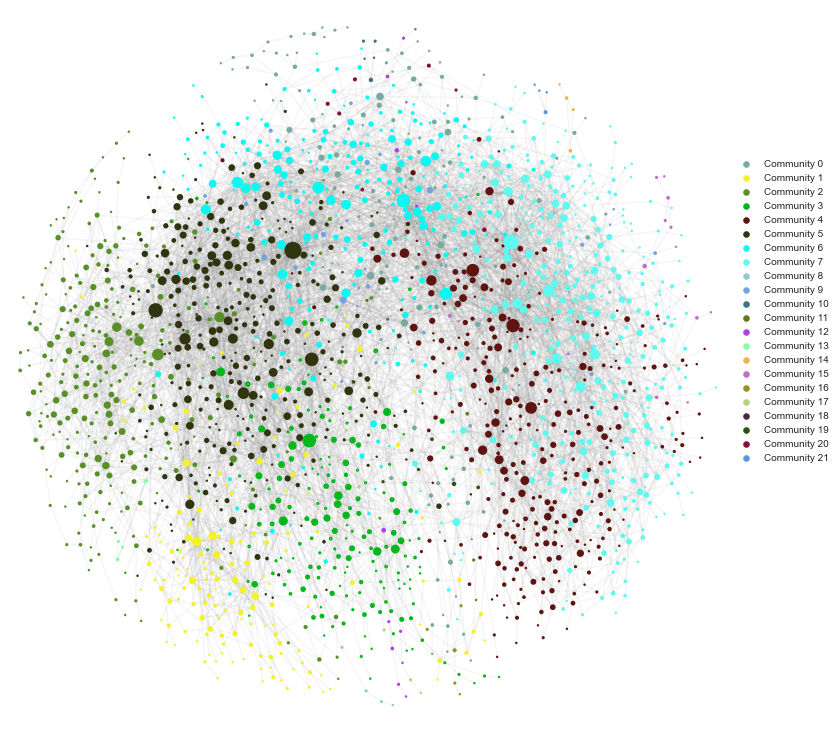

In [69]:
''' Plot community partition '''
nx.set_node_attributes(G_undir, partition, name = 'group') # node attributes 
## Use the configs from the big non-GCC network
network_part, config_part = nw.visualize(G_undir, plot_in_cell_below=False, config = config)

fig, ax = nw.draw_netwulf(network_part, figsize = 10)

# {community:color} dict for the legend
val_map = {partition[node['id']]:node['color'] for node in network_part['nodes']}

# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label='Community {}'.format(v), 
                marker='o',
                linestyle="None")
# Place legend
plt.legend(bbox_to_anchor = (1,0.8))

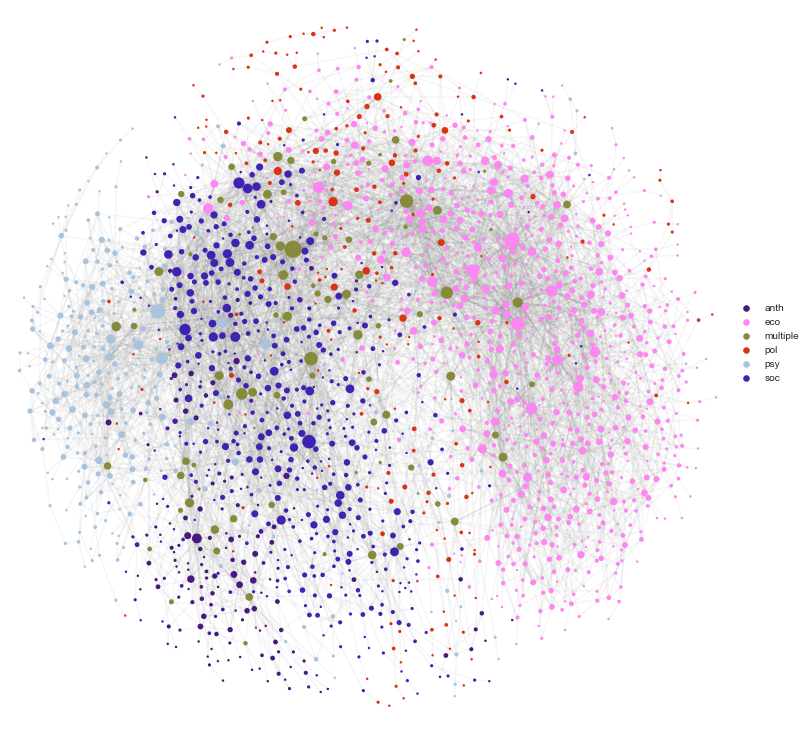

In [74]:
''' Plot community partition '''
nx.set_node_attributes(G_undir, inv_science_dict, name = 'group') # node attributes 
## Use the configs from the big non-GCC network
network_part, config_part = nw.visualize(G_undir, plot_in_cell_below=False, config = config)

fig, ax = nw.draw_netwulf(network_part, figsize = 10)

# {community:color} dict for the legend
val_map = {inv_science_dict[node['id']]:node['color'] for node in network_part['nodes']}

# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label=v, 
                marker='o',
                linestyle="None")
# Place legend
plt.legend(bbox_to_anchor = (1,0.6))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.19it/s]


BarnesHut Approximation  took  9.14  seconds
Repulsion forces  took  50.69  seconds
Gravitational forces  took  0.17  seconds
Attraction forces  took  0.09  seconds
AdjustSpeedAndApplyForces step  took  0.68  seconds


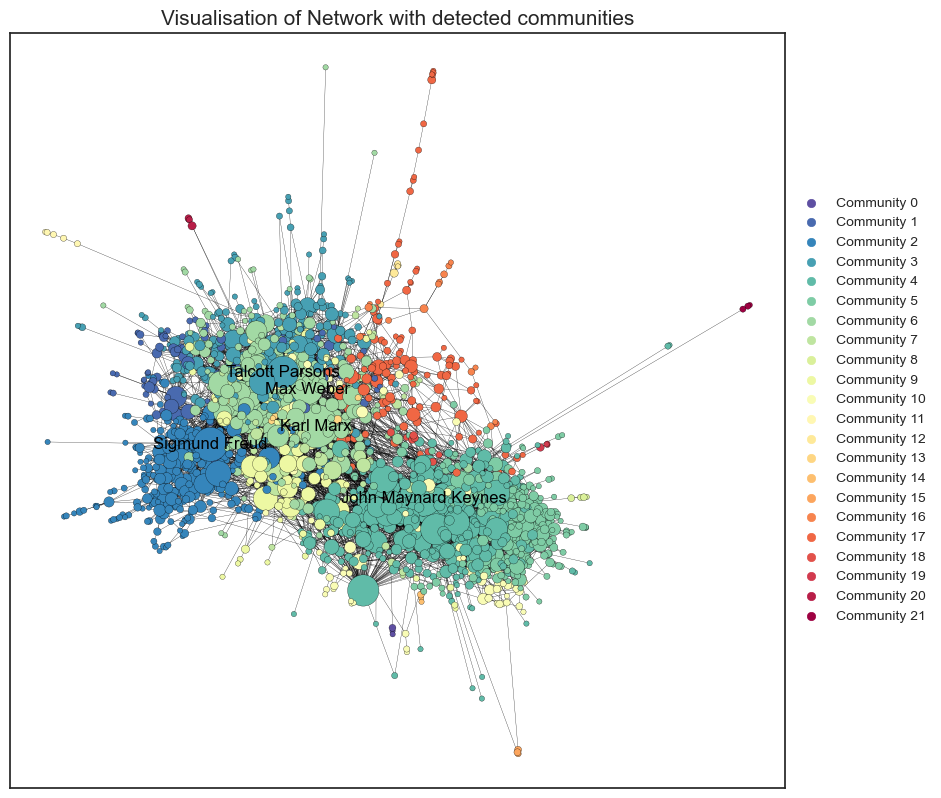

In [21]:
plt.style.use('seaborn-white')
# Get forceatlas positions
_pos = ForceAtlas2(outboundAttractionDistribution=True,
                   gravity=0.1,
                   verbose=True)\
       .forceatlas2_networkx_layout(G_undir, pos=None, iterations=1000)

# Get colors - use the value of the community 
c_values = list(partition.values())
# degree dict - scale node size
_d = dict(G_undir.degree) 

fig, ax = plt.subplots(dpi = 100, figsize = (10,10))

# Plot parameteres
_ks = {"node_color":c_values,
       "cmap": plt.cm.Spectral_r,
       "node_size":[10 + v*5 for v in _d.values()],
       "pos":_pos,
       "ax":ax,
       "with_labels":False,
       "edgecolors": 'black',
       "linewidths": 0.2,
       "width":0.2
       }

ax.set_title('Visualisation of Network with detected communities', size = 15)

# Set community legend
for v in set(c_values):
    plt.scatter([],[], c=[plt.cm.Spectral_r(v/max(c_values))], label='Community {}'.format(v))
    
# Place legend
plt.legend(bbox_to_anchor = (1,0.8))

nx.draw_networkx(G_undir, **_ks)

# Get top n connected nodes
top_n = 5
top_nodes = [x[0] for x in sorted(dict(G_undir.degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]]

labels = {}    
for node in G_undir.nodes():
    if node in  top_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node
        
nx.draw_networkx_labels(G_undir,_pos,labels,font_size=12,font_color='black')

plt.show()

In [55]:
fig.savefig('community_detection.png', dpi=300, bbox_inches='tight')

In [28]:
def _field_plt(_n=5):
    plt.style.use('seaborn-white')
    val_map = {'soc':"#6666ff",
               'anth':"#33cc33",
               'multiple':"#ff9966",
               'pol':"#ff4d4d",
               'psy': '#ff4dff',
               'eco': '#4dd2ff'}

    # Get colors - use the value of the community 
    c_values = [val_map[inv_science_dict[n]] for n in G_undir.nodes()]

    list(partition.values())
    # degree dict - scale node size
    _d = dict(G_undir.degree) 

    fig, ax = plt.subplots(dpi = 100, figsize = (10,10))

    # Plot parameteres
    _ks = {"node_color":c_values,
           "cmap": plt.cm.Spectral_r,
           "node_size":[10 + v*5 for v in _d.values()],
           "pos":_pos,
           "ax":ax,
           "with_labels":False,
           "edgecolors": 'black',
           "linewidths": 0.2,
           "width":0.2
           }

    ax.set_title('Visualisation of Network with Scientific Fields', size = 15)

    # Add legends
    for label in val_map.keys():
        ax.plot([],[],color=val_map[label], label=label, marker='o', linestyle="None")

    # Place legend
    plt.legend(bbox_to_anchor = (1,0.8))

    nx.draw_networkx(G_undir, **_ks)
    
    # Get top n connected nodes
    top_n = _n
    top_nodes = [x[0] for x in sorted(dict(G_undir.degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]]

    labels = {}    
    for node in G_undir.nodes():
        if node in  top_nodes:
            #set the node name as the key and the label as its value 
            labels[node] = node
            
    nx.draw_networkx_labels(G_undir,_pos,labels,font_size=12,font_color='black')
    plt.show()

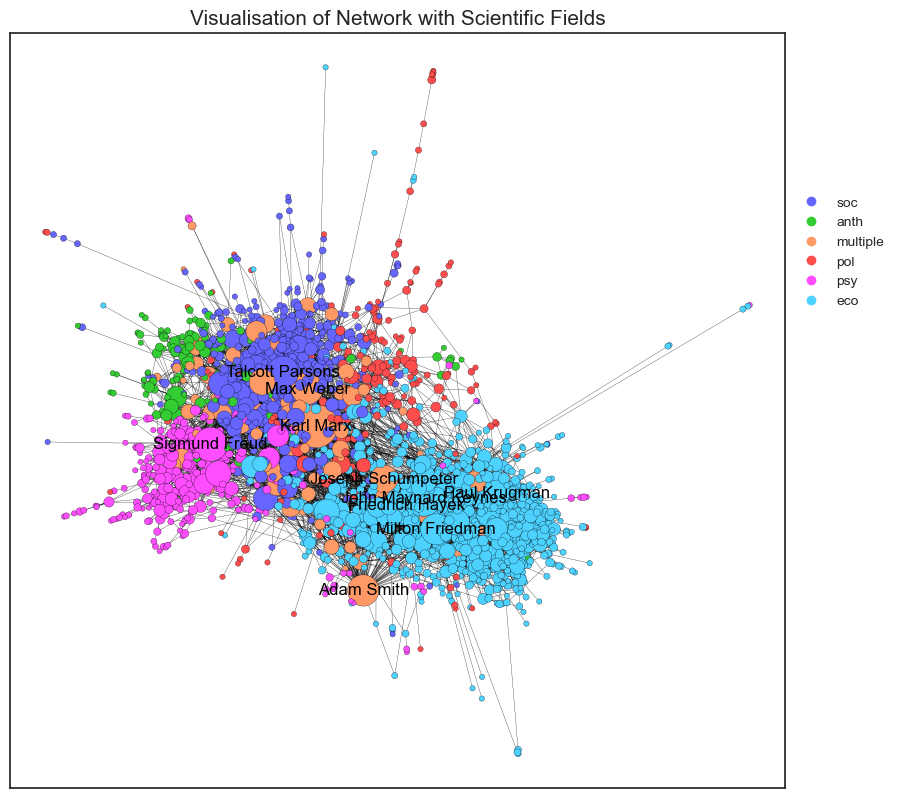

In [29]:
_field_plt(_n=10)

prøv https://github.com/beyondbeneath/bezier-curved-edges-networkx